In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")
import scipy.stats as stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve


In [2]:
df=pd.read_excel('Cafe_Data_MRA.xlsx')

In [3]:
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category,Unnamed: 10
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.00,11.88,0.00,61.88,BEVERAGE,NaN
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.00,23.75,0.00,123.75,BEVERAGE,NaN
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.00,9.50,0.00,49.50,BEVERAGE,NaN
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.00,11.88,0.00,61.88,BEVERAGE,NaN
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.00,10.69,0.00,55.69,BEVERAGE,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
 10  Unnamed: 10   0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 12.2+ MB


In [5]:
df.dtypes.value_counts()

float64           5
object            4
int64             1
datetime64[ns]    1
dtype: int64

### Missing values in the dataset:

In [6]:
df.isnull().sum()

Date                 0
Bill Number          0
Item Desc            0
Time                 0
Quantity             0
Rate                 0
Tax                  0
Discount             0
Total                0
Category             0
Unnamed: 10     145830
dtype: int64

### Descriptive statistics:

In [7]:
df.shape
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  145830 
no. of columns:  11


In [8]:
from IPython.display import display
# Database dimension
print("Database dimension - usage_data                          :",df.shape)

#Database size
print("\nDatabase size - usage_data                               :",df.size)

Database dimension - usage_data                          : (145830, 11)

Database size - usage_data                               : 1604130


In [9]:
df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,145830,365,2010-12-31 00:00:00,834,2010-04-01,2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bill Number,145830,69982,G0518006,23,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Desc,145830,580,NIRVANA HOOKAH SINGLE,8553,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,145830,36200,22:25:36,33,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,145830.00,NaN,NaN,NaN,NaT,NaT,1.12,0.48,1.00,1.00,1.00,1.00,30.00
Rate,145830.00,NaN,NaN,NaN,NaT,NaT,161.78,102.24,0.01,95.00,125.00,225.00,2100.00
Tax,145830.00,NaN,NaN,NaN,NaT,NaT,48.93,40.27,0.00,22.56,32.06,72.00,2731.25
Discount,145830.00,NaN,NaN,NaN,NaT,NaT,0.10,3.72,0.00,0.00,0.00,0.00,825.00
Total,145830.00,NaN,NaN,NaN,NaT,NaT,224.96,164.96,0.01,117.56,167.06,315.00,14231.25
Category,145830,9,FOOD,57023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for duplicate records in the data:

In [10]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 680


,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category,Unnamed: 10
198,2010-04-01,G0470211,B.M.T. PANINI,19:42:27,1,105.00,24.94,0.00,129.94,FOOD,NaN
199,2010-04-01,G0470211,B.M.T. PANINI,19:42:27,1,105.00,24.94,0.00,129.94,FOOD,NaN
244,2010-04-01,G0470270,B.M.T. PANINI,00:08:20,1,105.00,24.94,0.00,129.94,FOOD,NaN
551,2010-05-01,G0474965,PHILLYCREAM CHEESE &CHILLY PAN,13:33:51,1,105.00,24.94,0.00,129.94,FOOD,NaN
588,2010-05-01,G0475009,B.M.T. PANINI,17:12:21,1,105.00,24.94,0.00,129.94,FOOD,NaN
...,...,...,...,...,...,...,...,...,...,...,...
144615,2010-10-31,G0506562,DOPPIO,19:08:48,1,60.00,14.25,0.00,74.25,BEVERAGE,NaN
144727,2010-10-31,G0506566,CHEESE CAKE OF THE WEEK,19:20:52,1,105.00,24.94,0.00,129.94,FOOD,NaN
145129,2010-12-31,G0517963,CAPPUCCINO,20:50:13,1,60.00,14.25,0.00,74.25,BEVERAGE,NaN
145255,2010-12-31,G0517869,PHILLYCREAM CHEESE &CHILLY PAN,15:12:41,1,105.00,24.94,0.00,129.94,FOOD,NaN


### Dropping the Duplicates:

In [11]:
df.drop_duplicates(inplace=True) 

### Verifying the removal of Duplicates:

In [12]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category,Unnamed: 10


In [13]:
missing_values=pd.DataFrame(df.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / df.shape[0] * 100.00,2)
missing_values

,Features,Missing count,% missing
0,Date,0,0.00
1,Bill Number,0,0.00
2,Item Desc,0,0.00
3,Time,0,0.00
4,Quantity,0,0.00
5,Rate,0,0.00
6,Tax,0,0.00
7,Discount,0,0.00
8,Total,0,0.00
9,Category,0,0.00


### Checking distributions using histograms:

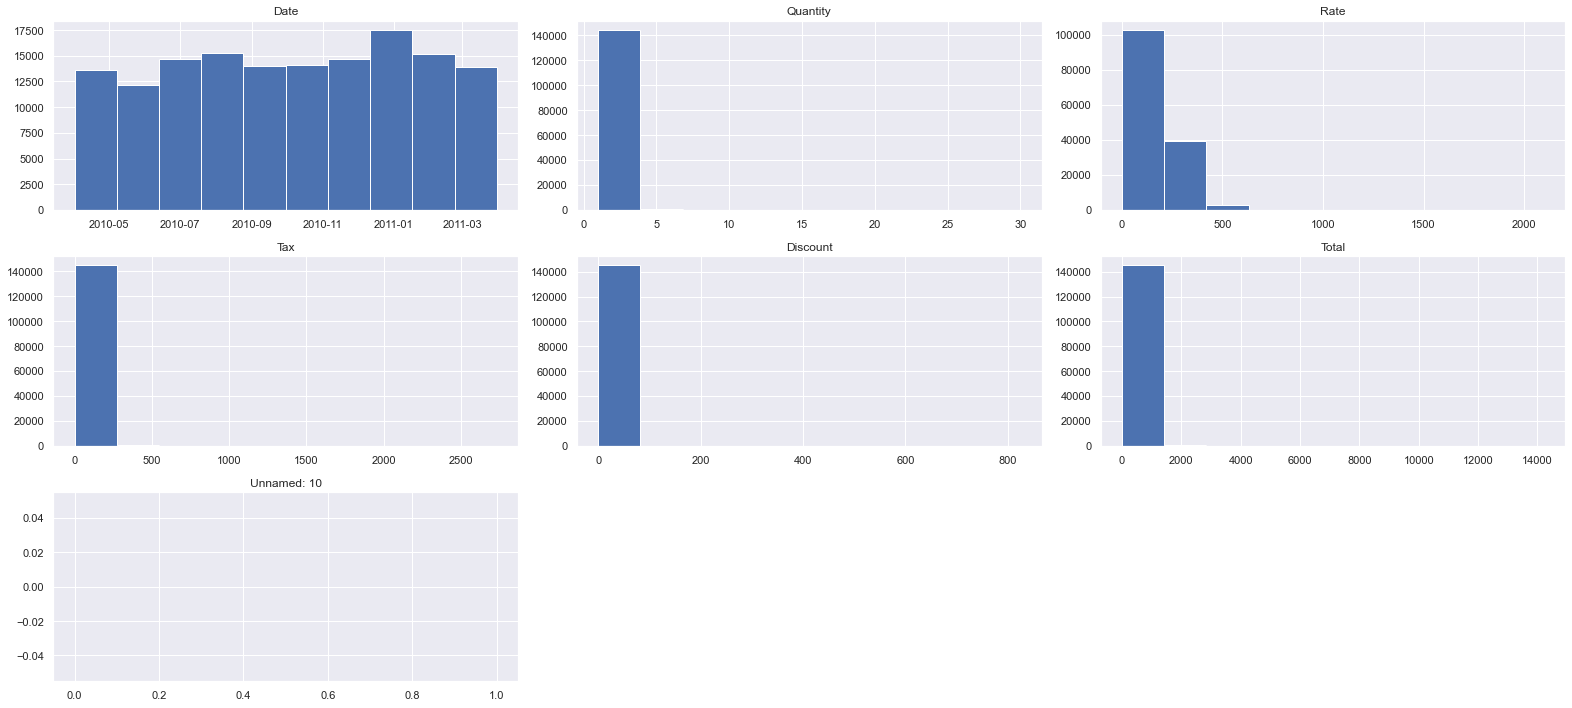

In [14]:
x = df.copy()
fig = plt.figure(figsize = (22,10))
ax = fig.gca()
x.hist(ax = ax)
plt.tight_layout()
plt.show()

In [15]:
df.describe()

,Quantity,Rate,Tax,Discount,Total,Unnamed: 10
count,145150.00,145150.00,145150.00,145150.00,145150.00,0.00
mean,1.12,161.73,48.93,0.10,224.97,NaN
std,0.48,102.21,40.29,3.73,165.05,NaN
min,1.00,0.01,0.00,0.00,0.01,NaN
25%,1.00,95.00,22.56,0.00,117.56,NaN
50%,1.00,125.00,32.06,0.00,167.06,NaN
75%,1.00,225.00,72.00,0.00,315.00,NaN
max,30.00,2100.00,2731.25,825.00,14231.25,NaN


### Univariate Analysis:

#### (a) Rate:

In [16]:
print('Range of values: ', df['Rate'].max()-df['Rate'].min())

Range of values:  2099.99


In [17]:
# Central values:

print('Minimum Age: ', df['Rate'].min())
print('Maximum Age: ', df['Rate'].max())
print('Mean value: ', df['Rate'].mean())
print('Median value: ', df['Rate'].median())
print('Standard deviation: ', df['Rate'].std())
print('Null values: ', df['Rate'].isnull().any())

Minimum Age:  0.01
Maximum Age:  2100.0
Mean value:  161.72778277643812
Median value:  125.0
Standard deviation:  102.21351433519563
Null values:  False


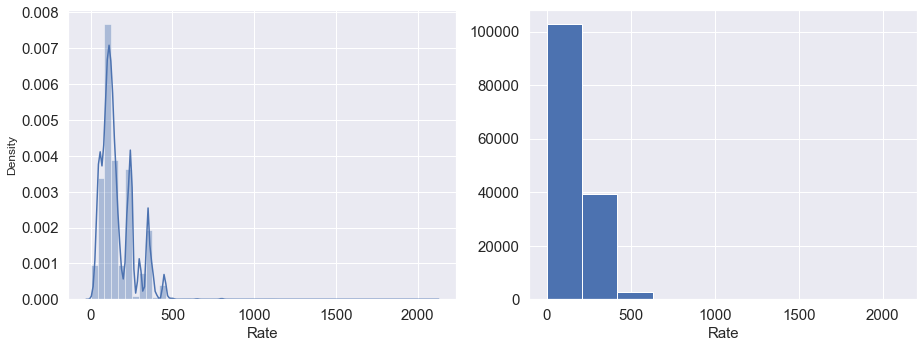

In [18]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Rate'],ax=ax2)
ax2.set_xlabel('Rate', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Rate'])
ax3.set_xlabel('Rate', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (b) Tax:

In [19]:
print('Range of values: ', df['Tax'].max()-df['Tax'].min())

Range of values:  2731.25


In [20]:
# Central values:

print('Minimum Age: ', df['Tax'].min())
print('Maximum Age: ', df['Tax'].max())
print('Mean value: ', df['Tax'].mean())
print('Median value: ', df['Tax'].median())
print('Standard deviation: ', df['Tax'].std())
print('Null values: ', df['Tax'].isnull().any())

Minimum Age:  0.0
Maximum Age:  2731.25
Mean value:  48.93175046502943
Median value:  32.06
Standard deviation:  40.28672042390153
Null values:  False


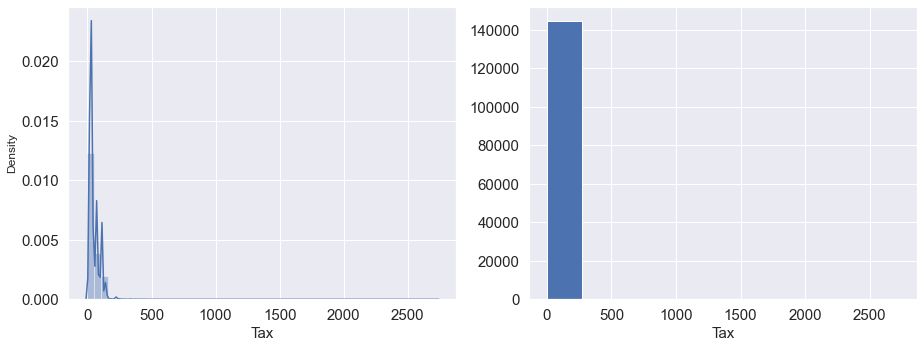

In [21]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Tax'],ax=ax2)
ax2.set_xlabel('Tax', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Tax'])
ax3.set_xlabel('Tax', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (c) Total:

In [22]:
print('Range of values: ', df['Rate'].max()-df['Rate'].min())

Range of values:  2099.99


In [23]:
# Central values:

print('Minimum Age: ', df['Rate'].min())
print('Maximum Age: ', df['Rate'].max())
print('Mean value: ', df['Rate'].mean())
print('Median value: ', df['Rate'].median())
print('Standard deviation: ', df['Rate'].std())
print('Null values: ', df['Rate'].isnull().any())

Minimum Age:  0.01
Maximum Age:  2100.0
Mean value:  161.72778277643812
Median value:  125.0
Standard deviation:  102.21351433519563
Null values:  False


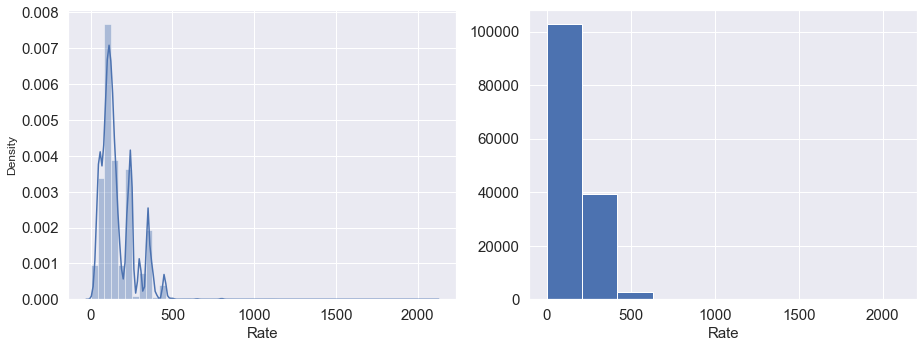

In [24]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Rate'],ax=ax2)
ax2.set_xlabel('Rate', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Rate'])
ax3.set_xlabel('Rate', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Category:

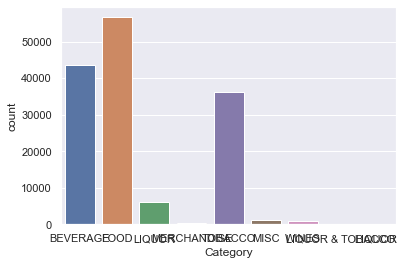

In [25]:
sns.countplot(data = df, x = 'Category')                                                  ## count plot
plt.show()

In [26]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    print("      ")
    print("----------------------------------------------------------------------------")
    print('Mean of '+ column,df[column].mean(),end=' ')
    print("      ")
    print('Median of '+ column,df[column].median(),end=' ')
    print("      ")
    print('Standard Deviation of '+ column,df[column].std(),end=' ')
    print("      ")
    print('Minimum values of '+ column,df[column].min(),end=' ')
    print("      ")
    print('Maximum Value of '+ column,df[column].max(),end=' ')
    print("      ")
    print('Range of '+ column,(df[column].max())-(df[column].min()),end=' ')
    print("      ")
    print('Null values of '+ column,df[column].isnull().any(),end=' ')
    print("      ")
    Q1=df[column].quantile(q=0.25)
    Q3=df[column].quantile(q=0.75)
    print('First Quartile (Q1) of '+ column, Q1)
    print('Third Quartile (Q3) of '+ column, Q3)
    print('Interquartile range (IQR) of '+ column, (Q3-Q1),end=' ')
    print("      ")   
    print('Skewness of '+ column, df[column].skew(),end=' ')
    print("      ") 
    print("----------------------------------------------------------------------------")
    
    
    plt.figure(figsize=(17,6))
    print(" Distribution , boxplot and lineplots of " + column) 
    print("----------------------------------------------------------------------------") 
    plt.subplot(1, 4, 1)    
    
    sns.distplot(df[column], kde=True, color='g');
    
    
    plt.subplot(1, 4, 2)
    sns.boxplot(df[column])
    plt.subplot(1, 4, 3)
    sns.lineplot(df.Category,df[column]);
 
    plt.subplot(1, 4, 4)
    sns.lineplot(df.Rate,df[column]);
  
    plt.tight_layout()
    plt.show()
    print("----------------------------------------------------------------------------")

In [27]:
df.columns

Index(['Date', 'Bill Number ', 'Item Desc', 'Time', 'Quantity', 'Rate', 'Tax',
       'Discount', 'Total', 'Category', 'Unnamed: 10'],
      dtype='object')

Description of Quantity
----------------------------------------------------------------------------
count   145150.00
mean         1.12
std          0.48
min          1.00
25%          1.00
50%          1.00
75%          1.00
max         30.00
Name: Quantity, dtype: float64       
----------------------------------------------------------------------------
Mean of Quantity 1.1218256975542542       
Median of Quantity 1.0       
Standard Deviation of Quantity 0.4782487927483342       
Minimum values of Quantity 1       
Maximum Value of Quantity 30       
Range of Quantity 29       
Null values of Quantity False       
First Quartile (Q1) of Quantity 1.0
Third Quartile (Q3) of Quantity 1.0
Interquartile range (IQR) of Quantity 0.0       
Skewness of Quantity 9.953310577072235       
----------------------------------------------------------------------------
 Distribution , boxplot and lineplots of Quantity
----------------------------------------------------------------------------


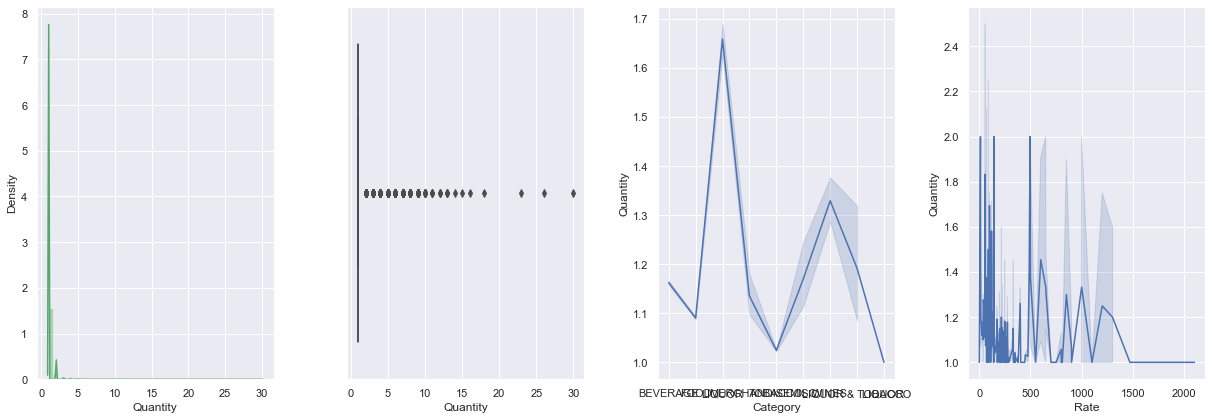

----------------------------------------------------------------------------
Description of Rate
----------------------------------------------------------------------------
count   145150.00
mean       161.73
std        102.21
min          0.01
25%         95.00
50%        125.00
75%        225.00
max       2100.00
Name: Rate, dtype: float64       
----------------------------------------------------------------------------
Mean of Rate 161.72778277643812       
Median of Rate 125.0       
Standard Deviation of Rate 102.21351433519563       
Minimum values of Rate 0.01       
Maximum Value of Rate 2100.0       
Range of Rate 2099.99       
Null values of Rate False       
First Quartile (Q1) of Rate 95.0
Third Quartile (Q3) of Rate 225.0
Interquartile range (IQR) of Rate 130.0       
Skewness of Rate 1.5683928808872138       
----------------------------------------------------------------------------
 Distribution , boxplot and lineplots of Rate
--------------------------------------

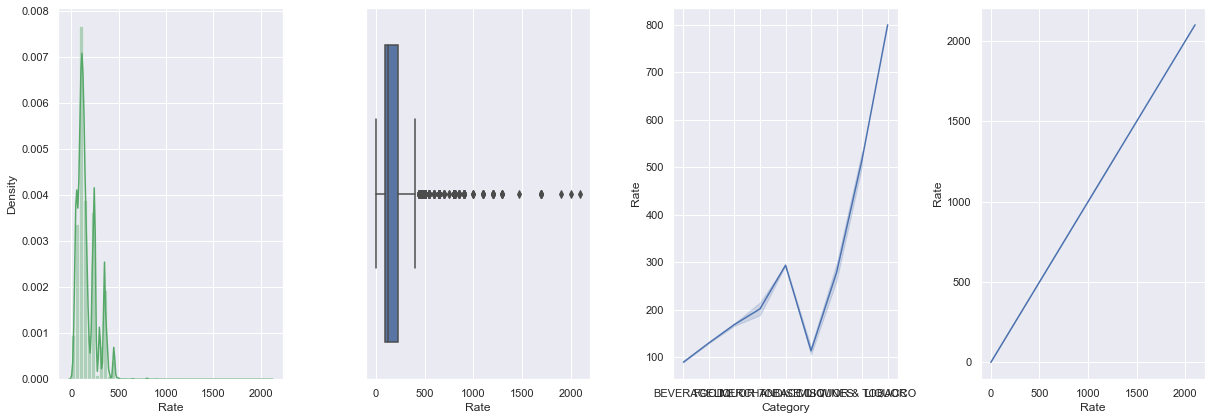

----------------------------------------------------------------------------
Description of Tax
----------------------------------------------------------------------------
count   145150.00
mean        48.93
std         40.29
min          0.00
25%         22.56
50%         32.06
75%         72.00
max       2731.25
Name: Tax, dtype: float64       
----------------------------------------------------------------------------
Mean of Tax 48.93175046502943       
Median of Tax 32.06       
Standard Deviation of Tax 40.28672042390153       
Minimum values of Tax 0.0       
Maximum Value of Tax 2731.25       
Range of Tax 2731.25       
Null values of Tax False       
First Quartile (Q1) of Tax 22.56
Third Quartile (Q3) of Tax 72.0
Interquartile range (IQR) of Tax 49.44       
Skewness of Tax 4.817955718647455       
----------------------------------------------------------------------------
 Distribution , boxplot and lineplots of Tax
-------------------------------------------------------

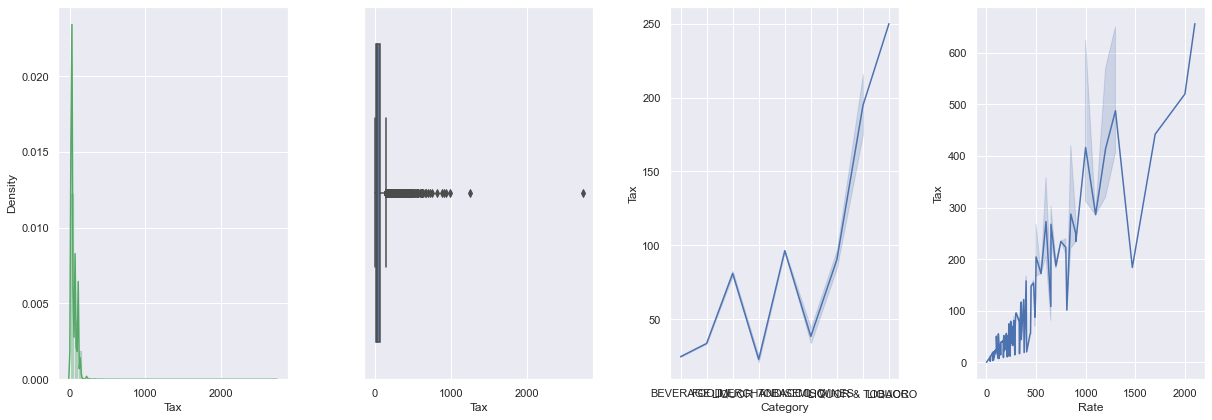

----------------------------------------------------------------------------
Description of Discount
----------------------------------------------------------------------------
count   145150.00
mean         0.10
std          3.73
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        825.00
Name: Discount, dtype: float64       
----------------------------------------------------------------------------
Mean of Discount 0.09530747502583535       
Median of Discount 0.0       
Standard Deviation of Discount 3.728523969643732       
Minimum values of Discount 0.0       
Maximum Value of Discount 825.0       
Range of Discount 825.0       
Null values of Discount False       
First Quartile (Q1) of Discount 0.0
Third Quartile (Q3) of Discount 0.0
Interquartile range (IQR) of Discount 0.0       
Skewness of Discount 105.91674253519767       
----------------------------------------------------------------------------
 Distribution , boxplot and lineplots of Di

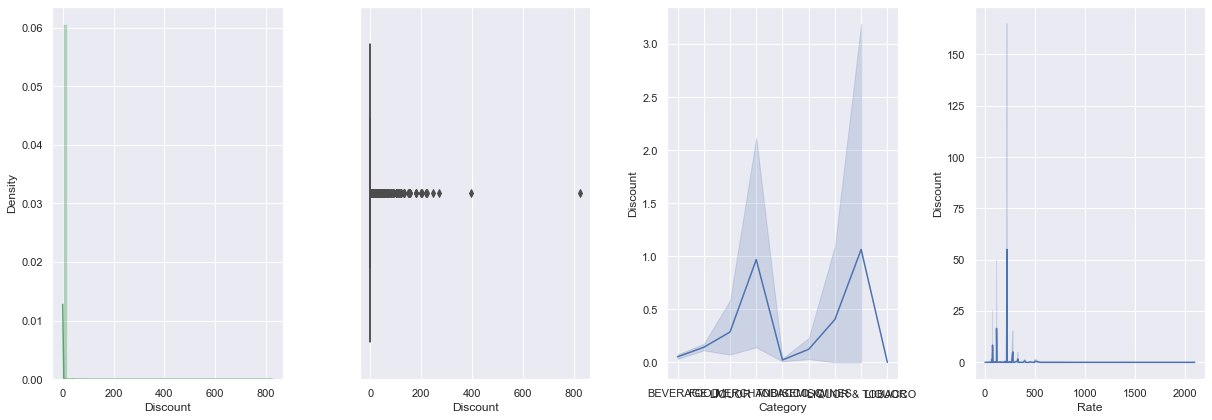

----------------------------------------------------------------------------
Description of Total
----------------------------------------------------------------------------
count   145150.00
mean       224.97
std        165.05
min          0.01
25%        117.56
50%        167.06
75%        315.00
max      14231.25
Name: Total, dtype: float64       
----------------------------------------------------------------------------
Mean of Total 224.97168274190977       
Median of Total 167.06       
Standard Deviation of Total 165.05279923691617       
Minimum values of Total 0.01       
Maximum Value of Total 14231.25       
Range of Total 14231.24       
Null values of Total False       
First Quartile (Q1) of Total 117.56
Third Quartile (Q3) of Total 315.0
Interquartile range (IQR) of Total 197.44       
Skewness of Total 7.241049463380261       
----------------------------------------------------------------------------
 Distribution , boxplot and lineplots of Total
------------------

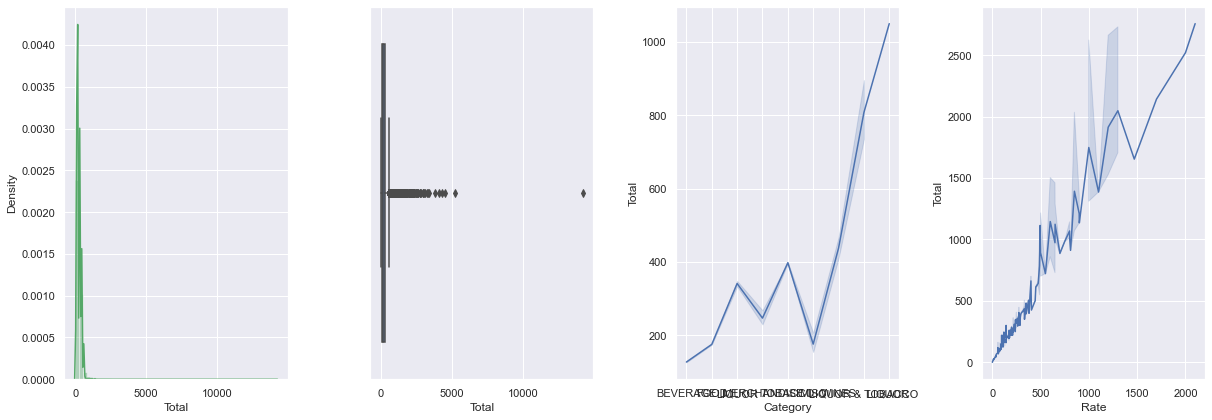

----------------------------------------------------------------------------
Description of Unnamed: 10
----------------------------------------------------------------------------
count   0.00
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 10, dtype: float64       
----------------------------------------------------------------------------
Mean of Unnamed: 10 nan       
Median of Unnamed: 10 nan       
Standard Deviation of Unnamed: 10 nan       
Minimum values of Unnamed: 10 nan       
Maximum Value of Unnamed: 10 nan       
Range of Unnamed: 10 nan       
Null values of Unnamed: 10 True       
First Quartile (Q1) of Unnamed: 10 nan
Third Quartile (Q3) of Unnamed: 10 nan
Interquartile range (IQR) of Unnamed: 10 nan       
Skewness of Unnamed: 10 nan       
----------------------------------------------------------------------------
 Distribution , boxplot and lineplots of Unnamed: 10
-----------------------------------------

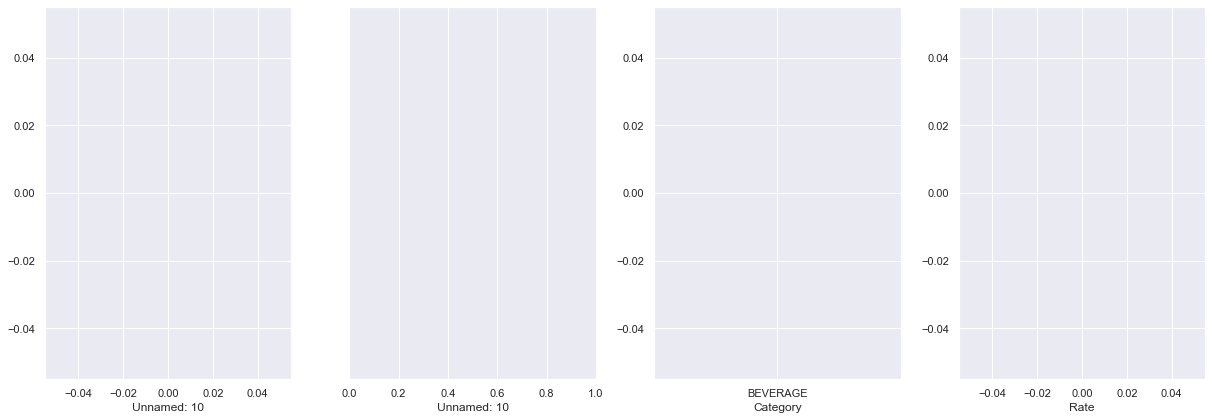

----------------------------------------------------------------------------


In [28]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

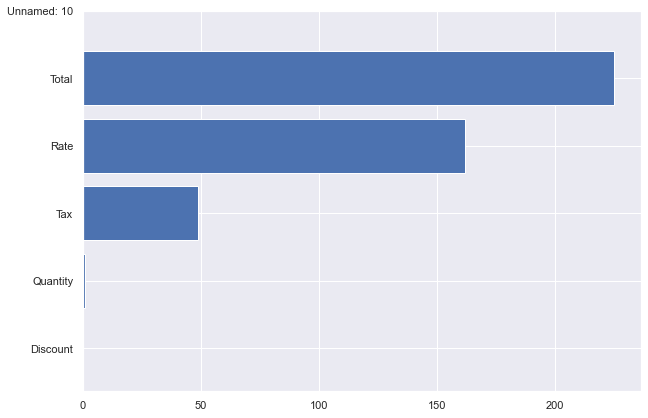

In [29]:
AvgR = df_num.mean()
AvgR = AvgR.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(df_num.columns)), AvgR.values, align='center')
plt.yticks(np.arange(len(df_num.columns)), AvgR.index)
plt.show()


<AxesSubplot:>

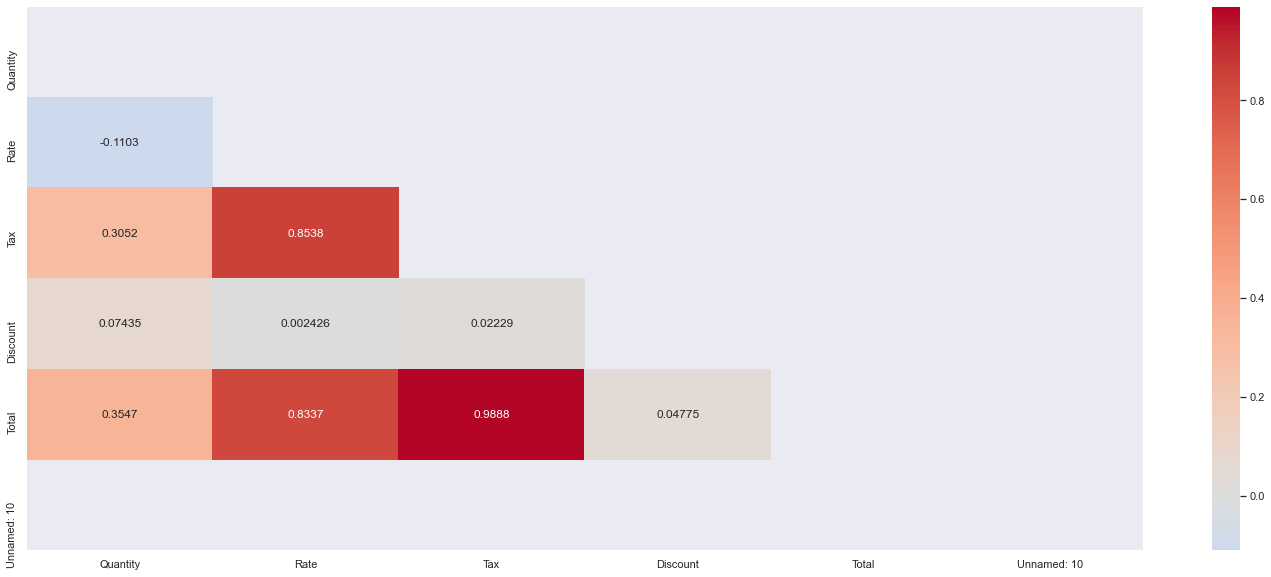

In [30]:
plt.figure(figsize = (25,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,fmt='.4g', mask=matrix,center=0,cmap= 'coolwarm')

In [31]:
df.corr().unstack().sort_values().drop_duplicates().sort_values(ascending = False).head(8)

Quantity  Quantity   1.00
Tax       Total      0.99
Rate      Tax        0.85
          Total      0.83
Total     Quantity   0.35
Tax       Quantity   0.31
Quantity  Discount   0.07
Discount  Total      0.05
dtype: float64

In [32]:
df.corr().unstack().sort_values().drop_duplicates().sort_values(ascending = True).head()

Quantity  Rate       -0.11
Discount  Rate        0.00
          Tax         0.02
          Total       0.05
Quantity  Discount    0.07
dtype: float64

<Figure size 1800x720 with 0 Axes>

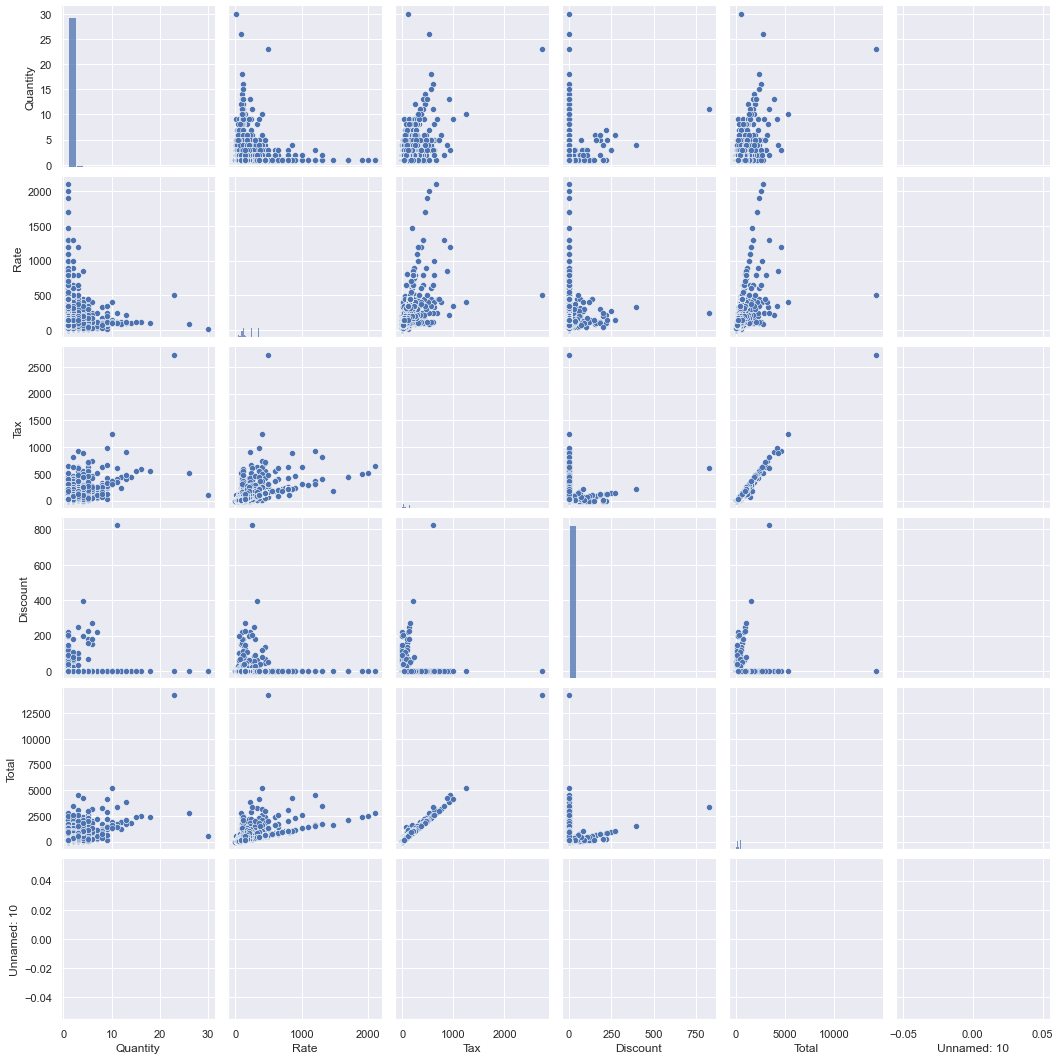

In [33]:
plt.figure(figsize = (25,10))
sns.pairplot(df);

#### Standardize the data:

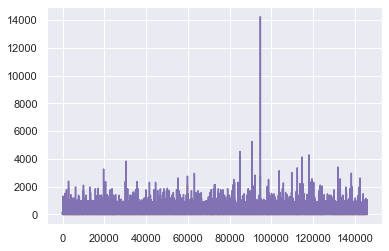

In [34]:
# prior to scaling 
plt.plot(df_num)
plt.show()

In [35]:
from scipy.stats import zscore 
scaled_df = df_num.apply(zscore)
scaled_df.head()


,Quantity,Rate,Tax,Discount,Total,Unnamed: 10
0,-0.25,-1.09,-0.92,-0.03,-0.99,NaN
1,-0.25,-0.60,-0.63,-0.03,-0.61,NaN
2,-0.25,-1.19,-0.98,-0.03,-1.06,NaN
3,-0.25,-1.09,-0.92,-0.03,-0.99,NaN
4,-0.25,-1.14,-0.95,-0.03,-1.03,NaN


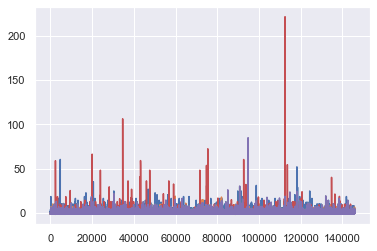

In [36]:
# prior to scaling 
plt.plot(scaled_df)
plt.show()

In [37]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145150 entries, 0 to 145829
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     145150 non-null  float64
 1   Rate         145150 non-null  float64
 2   Tax          145150 non-null  float64
 3   Discount     145150 non-null  float64
 4   Total        145150 non-null  float64
 5   Unnamed: 10  0 non-null       float64
dtypes: float64(6)
memory usage: 11.8 MB


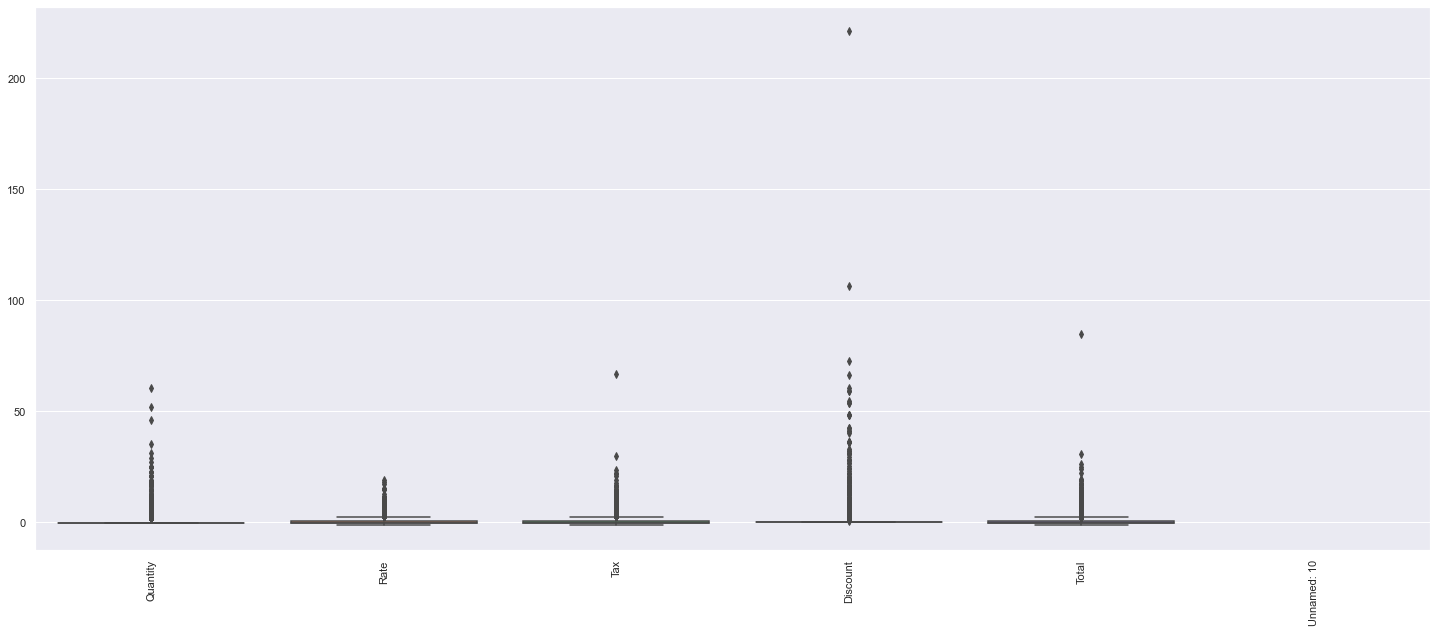

In [38]:
plt.figure(figsize = (25,10))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=90)
plt.show()